## Python Sentiment Analysis Project with NLTK and Hugging Face Transformers:
Author: Thato Seluku

### Read in data:

In [30]:
#Typical DS imports:
import pandas as pd
#Used for data manipulation and analysis, handling dataframes efficiently.
import numpy as np
#Provides support for numerical operations and handling arrays.
import matplotlib.pyplot as plt
#Used for creating static, interactive, and animated visualizations.
import seaborn as sns
#High-level interface for drawing attractive statistical graphics.

plt.style.use('ggplot')
import nltk

In [31]:
#Read in data:
df = pd.read_csv("/kaggle/input/reviews/Reviews.csv")

In [32]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [33]:
#View the size of the dataset
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


## Do a quick Exploratory Data Analysis (EDA):

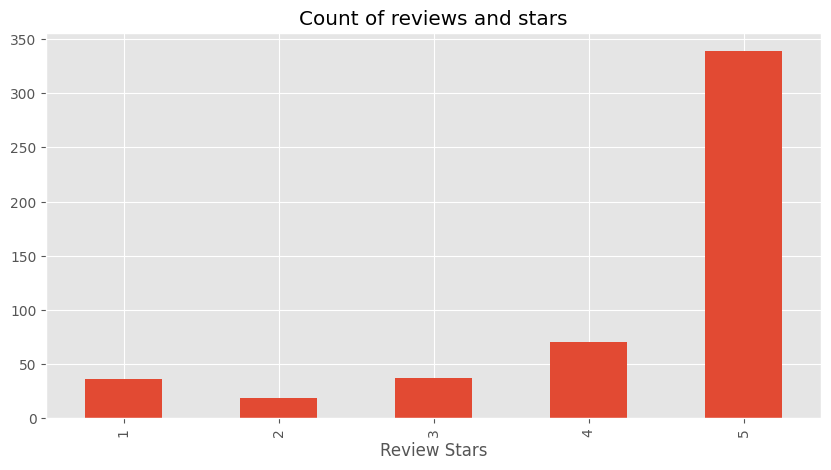

In [34]:
# Plot a bar chart of review counts by star ratings, sorted by index, with a title and specified size.
ax = df['Score'].value_counts().sort_index() \
.plot(kind='bar',
      title='Count of reviews and stars',
      figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()


### Basic NLTK:

In [35]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [37]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [40]:
#Run nltk on parts of speech to analyse each word:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [42]:
#Pretty print the chunked 10 chars of entities:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)
